In [1]:
import numpy as np 
import pandas as pd 
import sys
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
salaryData = pd.read_csv("Levels_Fyi_Salary_Data.csv")
salaryData.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


# Data filtering and cleaning

In [3]:
copy_salaryData = salaryData[[ 'totalyearlycompensation', 'company',  'title', 
       'location', 'yearsofexperience']]

clean_salaryData = copy_salaryData.dropna(subset=['company'])
clean_salaryData[clean_salaryData['company'].isna()]
titleList = pd.unique(clean_salaryData['title'])
locationList = pd.unique(clean_salaryData['location'])
companyList = pd.unique(clean_salaryData['company'])

np.set_printoptions(threshold=sys.maxsize)
print("Please select your position: \n", np.array(titleList))
print("Please select your location: \n", np.array(locationList))



Please select your position: 
 ['Product Manager' 'Software Engineer' 'Software Engineering Manager'
 'Data Scientist' 'Solution Architect' 'Technical Program Manager'
 'Human Resources' 'Product Designer' 'Marketing' 'Business Analyst'
 'Hardware Engineer' 'Sales' 'Recruiter' 'Mechanical Engineer'
 'Management Consultant']
Please select your location: 
 ['Redwood City, CA' 'San Francisco, CA' 'Seattle, WA' 'Sunnyvale, CA'
 'Mountain View, CA' 'Redmond, WA' 'Bellevue, WA' 'Menlo Park, CA'
 'London, EN, United Kingdom' 'Cupertino, CA' 'New York, NY'
 'Los Gatos, CA' 'Dublin, DN, Ireland' 'Baltimore, MD' 'Sacramento, CA'
 'Hillsboro, OR' 'Cambridge, EN, United Kingdom' 'Aliso Viejo, CA'
 'San Jose, CA' 'Bangalore, KA, India' 'Minsk, HM, Belarus'
 'Palo Alto, CA' 'Kirkland, WA' 'Washington, DC' 'Vancouver, BC, Canada'
 'Austin, TX' 'Boston, MA' 'San Diego, CA' 'New Orleans, LA'
 'Santa Clara, CA' 'Irvine, CA' 'Pittsburgh, PA' 'San Ramon, CA'
 'Los Angeles, CA' 'Folsom, CA' 'Charleston, SC

In [4]:
while(True):
    in_position = input("Enter your position as excat from above: ")
    in_location = input("Enter your location as excat from above: ")
    if (in_position in titleList and in_location in locationList ):
        break
        
clean_salaryData = pd.get_dummies(clean_salaryData, columns=['title', 'location','company'])
print(f"You enter {in_position} as your position and {in_location} as your location")

You enter Software Engineering Manager as your position and Seattle, WA as your location


In [5]:
position= "title_" + in_position
location = "location_" + in_location


In [6]:

q1_salaryData = clean_salaryData[["totalyearlycompensation",'yearsofexperience', location, position]]
q1_salaryData

qOne = q1_salaryData.quantile(0.25)
qThree = q1_salaryData.quantile(0.75)
IQR = qThree-qOne
q1_salaryData = q1_salaryData[~((q1_salaryData < (qOne - 1.5 *IQR)) | (q1_salaryData > (qThree + 1.5 * IQR))).any(axis=1)]

q1_salaryData


,totalyearlycompensation,yearsofexperience,"location_Seattle, WA",title_Software Engineering Manager
0,127000,1.5,0,0
1,100000,5.0,0,0
4,157000,5.0,0,0
8,120000,3.0,0,0
11,155000,5.0,0,0
...,...,...,...,...
62633,230000,5.0,0,0
62636,172000,4.0,0,0
62638,237000,2.0,0,0
62640,280000,8.0,0,0


In [7]:
train = q1_salaryData.sample(frac=0.6, random_state=1)
temp = q1_salaryData.drop(train.index)
test = temp.sample(frac=0.5,random_state=1)
val = q1_salaryData.drop(test.index)

ytrain = train['totalyearlycompensation']
xtrain= train.drop(columns=['totalyearlycompensation'])
ytest = test['totalyearlycompensation']
xtest= test.drop(columns=['totalyearlycompensation'])
yval = val['totalyearlycompensation']
xval = val.drop(columns=['totalyearlycompensation'])



In [62]:
linear_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=3)
])
linear_regression.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 5, momentum=0.4, nesterov=True), loss= 'mean_absolute_error')
# linear_regression.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 5), loss= 'mean_absolute_error')

hist = linear_regression.fit(xtrain,ytrain,epochs=500,validation_data)

Epoch 1/500
964/964 [==============================] - 1s 978us/step - loss: 114207.8438 - val_loss: 97642.8828
Epoch 2/500
964/964 [==============================] - 1s 930us/step - loss: 97134.6719 - val_loss: 96103.7422
Epoch 3/500
964/964 [==============================] - 1s 759us/step - loss: 95764.0391 - val_loss: 94791.9766
Epoch 4/500
964/964 [==============================] - 1s 803us/step - loss: 94442.8672 - val_loss: 93482.6172
Epoch 5/500
964/964 [==============================] - 1s 807us/step - loss: 93156.2578 - val_loss: 92216.3438
Epoch 6/500
964/964 [==============================] - 1s 820us/step - loss: 91895.9453 - val_loss: 90997.6094
Epoch 7/500
964/964 [==============================] - 1s 803us/step - loss: 90669.9688 - val_loss: 89787.9297
Epoch 8/500
964/964 [==============================] - 1s 783us/step - loss: 89474.6797 - val_loss: 88632.1797
Epoch 9/500
964/964 [==============================] - 1s 824us/step - loss: 88325.4766 - val_loss: 87512.6953


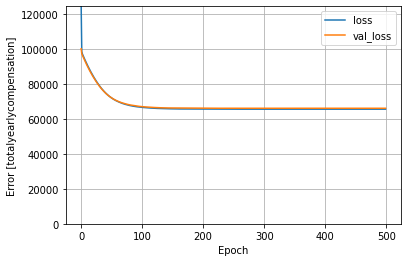

In [58]:
#reference from https://www.tensorflow.org/tutorials/keras/regression
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylim([0, max(hist.history['loss'])])
plt.xlabel('Epoch')
plt.ylabel('Error [totalyearlycompensation]')
plt.legend()
plt.grid(True)

In [59]:
linear_regression.evaluate(xtest,ytest)

302/302 [==============================] - 0s 664us/step - loss: 65979.2109


65979.2109375

In [60]:
q1_predict = linear_regression.predict(xtest).flatten()
def rmse(y_predict, y_test):
    return np.sqrt(np.square(np.subtract(y_test,y_predict)).mean())
rmse(q1_predict,ytest)

84333.2396884614

In [61]:
p_df = pd.DataFrame(columns=['p','y'])
type(q1_predict)
p_df['p'] = q1_predict
p_df['y'] = ytest.to_numpy()

p_df


,p,y
0,195718.718750,195000
1,226899.000000,440000
2,164538.437500,340000
3,189482.656250,342000
4,189482.656250,210000
...,...,...
9631,226899.000000,350000
9632,152066.312500,215000
9633,139594.203125,169000
9634,189482.656250,280000


C:\Users\JackZhu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


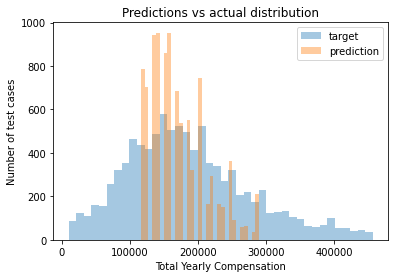

In [44]:
sns.distplot(ytest, label='target', kde=False)
sns.distplot(q1_predict, label='prediction', kde=False)

plt.legend()

plt.ylabel('Number of test cases')
plt.xlabel('Total Yearly Compensation')
plt.title('Predictions vs actual distribution')

plt.show()

In [15]:
in_yearEx = input("Please enter how many years of experience you have:")
in_yearEx = float(in_yearEx)
in_prediction =[[in_yearEx,1,1]]
ans_q1 = linear_regression.predict(in_prediction)

print( "If you join for a " + in_position +  " based on "+ str(in_yearEx) + " and in " + in_location + ", you will get: " + str(ans_q1[0][0]))

If you join for a Software Engineering Manager based on 3.0 and in Seattle, WA, you will get: 18651.9


In [35]:
print("Please select your company: \n", np.array(companyList))

Please select your company: 
 ['Oracle' 'eBay' 'Amazon' 'Apple' 'Microsoft' 'Salesforce' 'Facebook'
 'Uber' 'Oath' 'Google' 'Netflix' 'Pinterest' 'Linkedin' 'Adobe'
 'LinkedIn' 'amazon' 'Symantec' 'Intel Corporation' 'Intel' 'Lyft' 'Sony'
 'Yelp' 'Airbnb' 'EPAM' 'SAP' 'VMWare' 'Twitter' 'Slack'
 'Tableau Software' 'Cisco' 'Mixpanel' 'Zynga' 'MICROSOFT' 'Dropbox' 'IBM'
 'Shutterstock' 'Walmart Labs' 'linkedin' 'facebook' 'microsoft' 'Twilio'
 'Qualcomm' 'Intercom' 'Tesla' 'Expedia' 'GE Digital' 'CA Technologies'
 'Yahoo' 'Starbucks' 'Toyota Research Institute' 'Activision'
 'PlayStation' 'Squarespace' 'Intuit' 'Blackbaud' 'Citadel' 'Bloomberg'
 'ThoughtWorks' 'Yandex' 'AWS' 'vmware' 'Capital One' 'Nike'
 'Mckinsey & Company' 'Workday' 'Capital Group' 'Liberty Mutual' 'Splunk'
 'Mutual of Omaha' 'Zendesk' 'samsung' 'Autodesk' 'Samsung' 'Credit Karma'
 'Dell Technologies' 'Peloton' 'Proofpoint' 'Northwestern Mutual' 'Box'
 'SmartThings' 'ebay' 'BOOKING.COM' 'Akamai' 'Amazon web services' 

In [56]:
while(True):
    in_position = input("Enter your position as excat from above: ")
    in_location = input("Enter your location as excat from above: ")
    in_company = input("Enter your company excat as above: ")
    if (in_position in titleList and in_location in locationList and in_company in companyList):
        break

company = "company_"+in_company
position= "title_" + in_position
location = "location_" + in_location
print(f"You enter {in_company} as your company, {in_position} as your position and {in_location} as your location")

You enter google as your company, Software Engineer as your position and Cupertino, CA as your location


In [57]:
q2_salaryData = clean_salaryData[["totalyearlycompensation",'yearsofexperience', location, position, company]]
q2_train = q2_salaryData.sample(frac=0.8, random_state=1)
q2_test = q2_salaryData.drop(train.index)
q2_ytrain = q2_train['totalyearlycompensation']

q2_xtrain= q2_train.drop(columns=['totalyearlycompensation'])
q2_ytest = q2_test['totalyearlycompensation']

q2_xtest= q2_test.drop(columns=['totalyearlycompensation'])

In [58]:
q2_linear_regression = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=4)
])
q2_linear_regression.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.0001), loss= 'mean_squared_error')

hist_q2 = q2_linear_regression.fit(q2_xtrain,q2_ytrain,epochs=100,validation_split = 0.2)

Epoch 1/100
1253/1253 [==============================] - 2s 1ms/step - loss: 23588677632.0000 - val_loss: 21816324096.0000
Epoch 2/100
1253/1253 [==============================] - 1s 1ms/step - loss: 20772280320.0000 - val_loss: 20268263424.0000
Epoch 3/100
1253/1253 [==============================] - 1s 1ms/step - loss: 19496611840.0000 - val_loss: 19156580352.0000
Epoch 4/100
1253/1253 [==============================] - 1s 1ms/step - loss: 18602729472.0000 - val_loss: 18397843456.0000
Epoch 5/100
1253/1253 [==============================] - 1s 1ms/step - loss: 17971376128.0000 - val_loss: 17875480576.0000
Epoch 6/100
1253/1253 [==============================] - 1s 1ms/step - loss: 17525073920.0000 - val_loss: 17460355072.0000
Epoch 7/100
1253/1253 [==============================] - 1s 1ms/step - loss: 17210402816.0000 - val_loss: 17174840320.0000
Epoch 8/100
1253/1253 [==============================] - 1s 1ms/step - loss: 16975576064.0000 - val_loss: 16962835456.0000
Epoch 9/100
1253

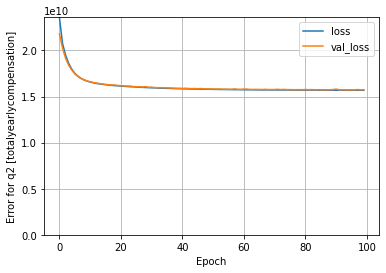

In [59]:
plt.plot(hist_q2.history['loss'], label='loss')
plt.plot(hist_q2.history['val_loss'], label='val_loss')
plt.ylim([0, max(hist_q2.history['loss'])])
plt.xlabel('Epoch')
plt.ylabel('Error for q2 [totalyearlycompensation]')
plt.legend()
plt.grid(True)

In [60]:
q2_linear_regression.evaluate(q2_xtest,q2_ytest)

623/623 [==============================] - 1s 1ms/step - loss: 32768573440.0000


32768573440.0

In [66]:
q2_predict = q2_linear_regression.predict(q2_xtest).flatten()
def rmse(y_predict, y_test):
    return np.sqrt(np.square(np.subtract(y_test,y_predict)).mean())
rmse(q2_predict,q2_ytest)

181020.9138408381

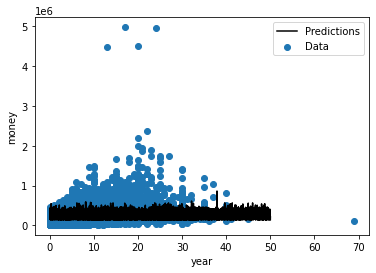

In [68]:
x = tf.linspace(0.0, 50, q2_predict.shape[0])

plt.scatter(q2_xtrain['yearsofexperience'], q2_ytrain, label='Data')
plt.plot(x, q2_predict, color='k', label='Predictions')
plt.xlabel('year')
plt.ylabel('money')
plt.legend()

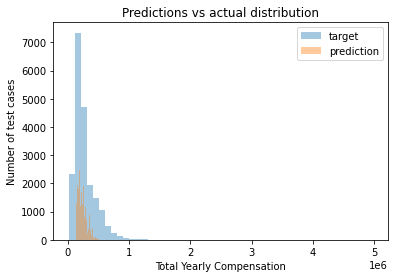

In [74]:
sns.distplot(q2_ytest, label='target', kde=False)
sns.distplot(q2_predict, label='prediction', kde=False)

plt.legend()

plt.ylabel('Number of test cases')
plt.xlabel('Total Yearly Compensation')
plt.title('Predictions vs actual distribution')

plt.show()

In [75]:
in_yearEx = input("Please enter how many years of experience you have:")
in_yearEx = float(in_yearEx)
in_prediction =[[in_yearEx,1,1,1]]
ans_q2 = q2_linear_regression.predict(in_prediction)
print( "If you accpect an offer for a " + in_position + " from " + in_company + " based on "+ str(in_yearEx) + " and in " + in_location + ", you will get: " + str(ans_q2[0][0]))


If you accpect an offer for a Software Engineer from google based on 6.0 and in Cupertino, CA, you will get: 240180.84


In [78]:
in_stay = input("how long will you going to stay:")
in_stay = float(in_stay)
in_prediction =[[in_yearEx+in_stay,1,1,1]]
q2_linear_regression.predict(in_prediction)

print( "You will be getting " + str(ans_q2[0][0]) + " for a " + in_position + " after " + str(in_stay) + " years joining to " + in_company  )


You will be getting 240180.84 for a Software Engineer after 4.0 years joining to google
